# Data Mining Assignment 3

## Task 1: Labor Negotiations

In [748]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read in file with semicolon delimiter
df = pd.read_csv('data/labor_negotiationsStudents.csv', ';')

# check how the data looks
print(df.head())
# check data types
print(df.dtypes)
print('\nRows=' + str(len(df.index)) + '\n')
print('Columns=' + str(len(df.columns)) + '\n')
print('Number of NaN:''\n')
df.isna().sum()
print(df)

   profession  duration  wage1  wage2  wage3 cola  hours pension  stby_pay  \
0           1       2.0   2.47    NaN   2.46  NaN   41.0    none       2.0   
1           2       1.0   1.99   3.04    NaN   tc   36.0    none       NaN   
2           3       1.0   2.97    NaN   5.02   tc   40.0     NaN       NaN   
3           4       1.0  -4.51   3.98    NaN  NaN   39.0     NaN       NaN   
4           5       2.0  -4.51   3.96    NaN   tc   38.0    none       NaN   

   shift_diff educ_allow  holidays       vacation lngtrm_disabil dntl_ins  \
0         4.0        NaN      12.0  below average            NaN      NaN   
1         4.0         no      13.0  below average            NaN      NaN   
2        25.0      maybe      10.0  below average            NaN     half   
3         NaN        NaN       9.0        average            NaN      NaN   
4         NaN        NaN       NaN        average            NaN     half   

  breavement Empl.hplan consent  
0        NaN       half      ??  


c:\users\stadl\pycharmprojects\data-mining-ws-21\venv\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


## profession

Amount of NULL values

False
0
0


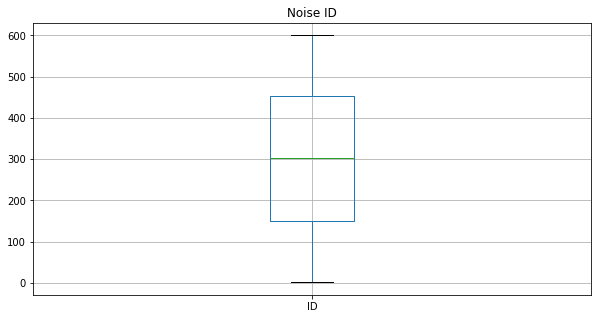

In [749]:
# Consistency
# Accuraccy
# Completeness
# Noise
# Interpretability

# get duplicates
pd.concat(g for _, g in df.groupby("profession") if len(g) > 1)
# remove them
df = df[~df.index.duplicated(keep='first')]

# profession is actually an ID so rename it
df = df.rename(columns={'profession': 'ID'})

s = pd.Series(df['ID'])
for x in s:
    # check if all values are integers
    if type(x) is not type(1):
        print(x)
    # check if all values are in valid range
    if x > 600 or x < 1:
        print(x)

# check if a value is missing
print('Amount of NULL values\n')
print(s.isnull().values.any())
print(s.isna().sum())
print(s.isnull().sum())

# check noise
df.boxplot(
    column=['ID'],
    figsize=(10, 5))
plt.title('Noise ID')
plt.savefig('exports/01_id_noise.png')
plt.show()

## duration

Amount of NULL values

True
11
11
2.0882852292020373
False
0
0


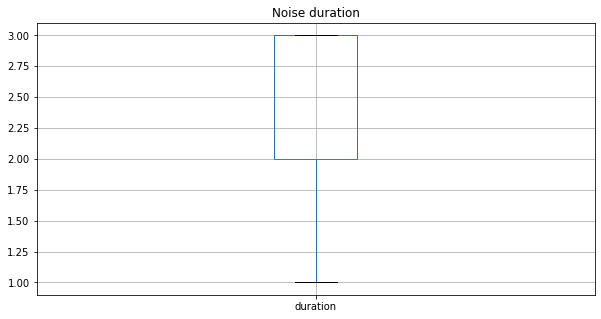

In [750]:
# Consistency
# Accuraccy
# Completeness
# Noise
# Interpretability

s = pd.Series(df['duration'])
for x in s:
    # check if all values are float
    if type(x) is not type(1.0):
        print('Invalid Type: ' + str(x))
    # check if all values are in valid range
    if x > 7 or x < 1:
        print('Out of range: ' + str(x))

# check if a value is missing
print('Amount of NULL values\n')
print(s.isnull().values.any())
print(s.isna().sum())
print(s.isnull().sum())
print(s.mean())
# replace 11 NaN-Values with mean value
df.duration.fillna(s.mean(), inplace=True)
print(s.isnull().values.any())
print(s.isna().sum())
print(s.isnull().sum())

# check noise
df.boxplot(
    column=['duration'],
    figsize=(10, 5))
plt.title('Noise duration')
plt.savefig('exports/02_duration_noise.png')
plt.show()

## wages

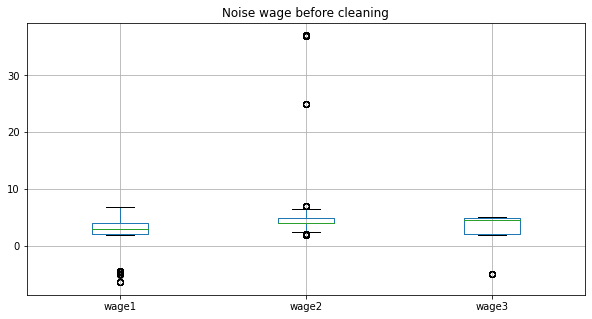

In [751]:
df.boxplot(column=['wage1', 'wage2', 'wage3'],
           figsize=(10, 5))
plt.title('Noise wage before cleaning')
plt.savefig('exports/03_wages_with_orig_noise.png')
plt.show()

## wage1

Acceptable range: [2.0 - 7.0]

Zeros: 0

Negative: 73

Negative out of range if would be positive: 0

Positive out of range: 46

Min: -6.43

---- converted to positive ----

Negative: 0

---- rounded up to 2.0 ----

Amnt. of values below 2.0: 0

Min: 2.0

Amount of NULL values

Null values exist: True
Amount of NaN/NULL values: 22/22
Mean:3.6332525951557093
---- NULL values after cleaning ----

Null values exist: False
Amount of NaN/NULL values: 0/0
Mean: 3.633252595155709


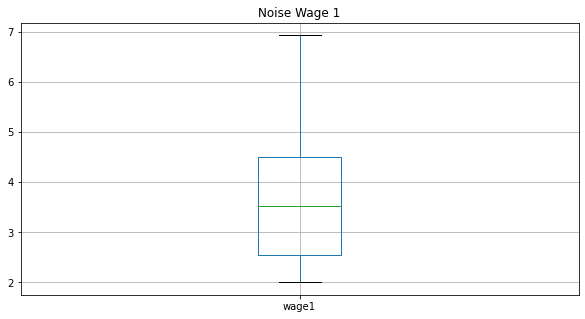

In [752]:
# Consistency
# Accuraccy
# Completeness
# Noise
# Interpretability


s = pd.Series(df['wage1'])
count_neg = 0
count_zero = 0
count_pos_out_of_range = 0
count_neg_out_of_range = 0
for x in s:
    # check if all values are float
    if type(x) is not type(1.0):
        print('Invalid Type: ' + str(x))
    # check if positive but not in range
    if 2.0 > x > 0:
        count_pos_out_of_range += 1
    # check if negative and if would be positive are out of range
    if 0 > x > -2.0 or x < -7.0:
        count_neg_out_of_range += 1
    # check if is 0
    if x == 0:
        count_zero += 1
    if x < 0:
        count_neg += 1

print('Acceptable range: [2.0 - 7.0]\n')
print('Zeros: ' + str(count_zero) + '\n')
print('Negative: ' + str(count_neg) + '\n')
print('Negative out of range if would be positive: ' + str(count_neg_out_of_range) + '\n')
print('Positive out of range: ' + str(count_pos_out_of_range) + '\n')
print('Min: ' + str(df.wage1.min()) + '\n')

# making negative to positive
df.wage1 = df.wage1.abs()

print('---- converted to positive ----\n')
print('Negative: ' + str(df.wage1.lt(0).sum()) + '\n')

# round all values beneath 2.0 up to 2.0
df.loc[df.wage1 < 2.0, 'wage1'] = 2.0
print('---- rounded up to 2.0 ----\n')
print('Amnt. of values below 2.0: ' + str(df.wage1.lt(2.0).sum()) + '\n')
print('Min: ' + str(df.wage1.min()) + '\n')

# check if a value is missing
print('Amount of NULL values\n')
print('Null values exist: ' + str(s.isnull().values.any()))
print('Amount of NaN/NULL values: ' + str(s.isna().sum()) + '/' + str(s.isnull().sum()))
print('Mean:' + str(s.mean()))
# # replace 11 NaN-Values with mean value
df.wage1.fillna(s.mean(), inplace=True)
print('---- NULL values after cleaning ----\n')
print('Null values exist: ' + str(s.isnull().values.any()))
print('Amount of NaN/NULL values: ' + str(s.isna().sum()) + '/' + str(s.isnull().sum()))
print('Mean: ' + str(s.mean()))
# check noise
df.boxplot(
    column=['wage1'],
    figsize=(10, 5))
plt.title('Noise Wage 1')
plt.savefig('exports/04_wage1_noise.png')
plt.show()

## wage2

Acceptable range: [2.0 - 7.0]

Zeros: 0
Negative: 0
Negative out of range if would be positive: 0
Positive in range 0 to 2.0: 13
Positive in range > 7.0: 43
Min: 1.96
Max: 37.04
---- rounded up to 2.0 ----

Amnt. of values below 2.0: 0

Min: 2.0

Amount of NULL values

Null values exist: True
Amount of NaN/NULL values: 129/129
---- NULL values after cleaning ----

Null values exist: True
Amount of NaN/NULL values: 172/172
Mean: 4.006728971962617


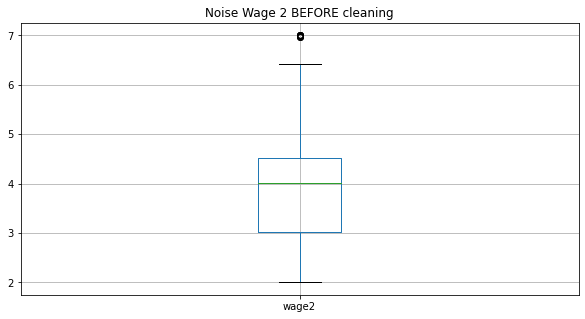

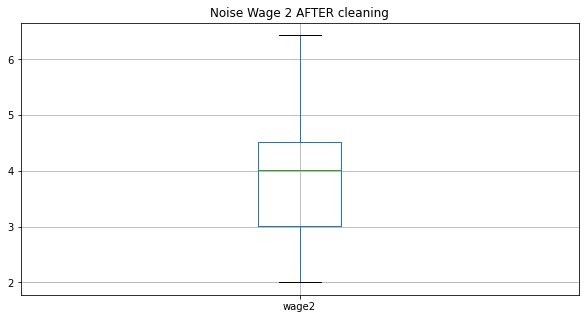

In [753]:
# Consistency
# Accuraccy
# Completeness
# Noise
# Interpretability

s = pd.Series(df['wage2'])
count_neg = 0
count_zero = 0
count_pos_out_of_range = 0
count_neg_out_of_range = 0
count_pos_out_of_range_upper = 0

for x in s:
    # check if all values are float
    if type(x) is not type(1.0):
        print('Invalid Type: ' + str(x))
    # check if positive but not in range
    if 2.0 > x > 0:
        count_pos_out_of_range += 1
    # check if negative and if would be positive are out of range
    if 0 > x > -2.0 or x < -7.0:
        count_neg_out_of_range += 1
    # check if is 0
    if x == 0:
        count_zero += 1
    if x < 0:
        count_neg += 1
    if x > 7.0:
        count_pos_out_of_range_upper += 1

print('Acceptable range: [2.0 - 7.0]\n')
print('Zeros: ' + str(count_zero))
print('Negative: ' + str(count_neg))
print('Negative out of range if would be positive: ' + str(count_neg_out_of_range))
print('Positive in range 0 to 2.0: ' + str(count_pos_out_of_range))
print('Positive in range > 7.0: ' + str(count_pos_out_of_range_upper))
print('Min: ' + str(df.wage2.min()))
print('Max: ' + str(df.wage2.max()))

# round all values beneath 2.0 up to 2.0
df.loc[df.wage2 < 2.0, 'wage2'] = 2.0
print('---- rounded up to 2.0 ----\n')
print('Amnt. of values below 2.0: ' + str(df.wage2.lt(2.0).sum()) + '\n')
print('Min: ' + str(df.wage2.min()) + '\n')

# check if a value is missing
print('Amount of NULL values\n')
print('Null values exist: ' + str(s.isnull().values.any()))
print('Amount of NaN/NULL values: ' + str(s.isna().sum()) + '/' + str(s.isnull().sum()))
# replace values greater than 7.0  with NaN
df.loc[df.wage2 > 7.0, 'wage2'] = np.nan

print('---- NULL values after cleaning ----\n')
print('Null values exist: ' + str(s.isnull().values.any()))
print('Amount of NaN/NULL values: ' + str(s.isna().sum()) + '/' + str(s.isnull().sum()))
print('Mean: ' + str(s.mean()))

# check noise
df.boxplot(
    column=['wage2'],
    figsize=(10, 5))
plt.title('Noise Wage 2 BEFORE cleaning')
plt.savefig('exports/05_01_wage2_noise.png')
plt.show()

Q1 = df.wage2.quantile(0.25)
Q3 = df.wage2.quantile(0.75)
IQR = Q3 - Q1  #IQR is interquartile range.
iqr_filter = (df.wage2 >= Q1 - 1.5 * IQR) & (df.wage2 <= Q3 + 1.5 * IQR)
df = df.loc[iqr_filter]
# check noise
df.boxplot(
    column=['wage2'],
    figsize=(10, 5))
plt.title('Noise Wage 2 AFTER cleaning')
plt.savefig('exports/05_02_wage2_noise.png')
plt.show()

## wage3

Acceptable range: [2.0 - 7.0]

Zeros: 0
Negative: 10
Negative out of range if would be positive: 0
Positive in range 0 to 2.0: 8
Positive in range > 7.0: 43
Min: -5.03
Max: 5.14
Amount of NULL values

Null values exist: True
Amount of NaN/NULL values: 302/302
Amount of NULL values

Null values exist: True
Amount of NaN/NULL values: 312/312
Min: 1.97
Max: 5.14
Min: 2.0
Max: 5.14


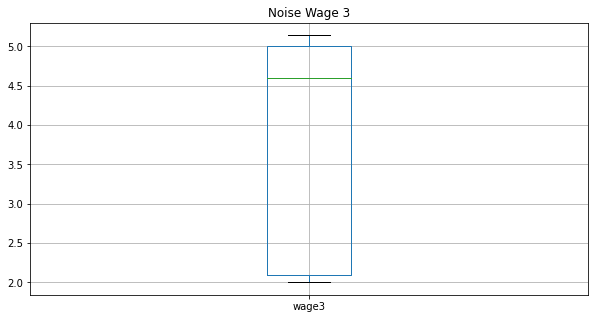

In [754]:
# Consistency
# Accuraccy
# Completeness
# Noise
# Interpretability
#
s = pd.Series(df['wage3'])
count_neg = 0
count_zero = 0
count_pos_out_of_range = 0
count_neg_out_of_range = 0
for x in s:
    # check if all values are float
    if type(x) is not type(1.0):
        print('Invalid Type: ' + str(x))
    # check if positive but not in range
    if 2.0 > x > 0:
        count_pos_out_of_range += 1
    # check if negative and if would be positive are out of range
    if 0 > x > -2.0 or x < -7.0:
        count_neg_out_of_range += 1
    # check if is 0
    if x == 0:
        count_zero += 1
    if x < 0:
        count_neg += 1

print('Acceptable range: [2.0 - 7.0]\n')
print('Zeros: ' + str(count_zero))
print('Negative: ' + str(count_neg))
print('Negative out of range if would be positive: ' + str(count_neg_out_of_range))
print('Positive in range 0 to 2.0: ' + str(count_pos_out_of_range))
print('Positive in range > 7.0: ' + str(count_pos_out_of_range_upper))
print('Min: ' + str(df.wage3.min()))
print('Max: ' + str(df.wage3.max()))

# making negative to positive
# df.wage3 = df.wage3.abs()
#
# print('---- converted to positive ----\n')
# print('Negative: ' + str(df.wage3.lt(0).sum()) + '\n')


# check if a value is missing
print('Amount of NULL values\n')
print('Null values exist: ' + str(s.isnull().values.any()))
print('Amount of NaN/NULL values: ' + str(s.isna().sum()) + '/' + str(s.isnull().sum()))
# remove values < 0.0
df.loc[df.wage3 < 0.0, 'wage3'] = np.nan
print('Amount of NULL values\n')
print('Null values exist: ' + str(s.isnull().values.any()))
print('Amount of NaN/NULL values: ' + str(s.isna().sum()) + '/' + str(s.isnull().sum()))
print('Min: ' + str(df.wage3.min()))
print('Max: ' + str(df.wage3.max()))
df.loc[df.wage3 < 2.0, 'wage3'] = 2.0
print('Min: ' + str(df.wage3.min()))
print('Max: ' + str(df.wage3.max()))

# check noise
df.boxplot(
    column=['wage3'],
    figsize=(10, 5))
plt.title('Noise Wage 3')
plt.savefig('exports/06_wage3_noise.png')
plt.show()

## cola

In [755]:
# Consistency
# Accuraccy
# Completeness
# Noise
# Interpretability

# 5   cola : cost of living allowance
# [none, tcf, tc]
s = pd.Series(df['cola'])
others_counter = 0
for x in s:
    # check if all values are float
    if x == 'none' or x == 'tcf' or x == 'tc':
        pass
    else:
        others_counter += 1
print('others: ' + str(others_counter))
print('Amount of NaN/NULL values: ' + str(s.isna().sum()) + '/' + str(s.isnull().sum()))
# replace NaN values with 'none'
df.cola.fillna('none', inplace=True)
print('Amount of NaN/NULL values: ' + str(s.isna().sum()) + '/' + str(s.isnull().sum()))
df[['ID', 'cola']].groupby('cola').count()

others: 183
Amount of NaN/NULL values: 183/183
Amount of NaN/NULL values: 0/0


,ID
cola,
none,314
tc,64
tcf,42


## hours

Min: 9.0
Max: 63.0
Outside of range: 97


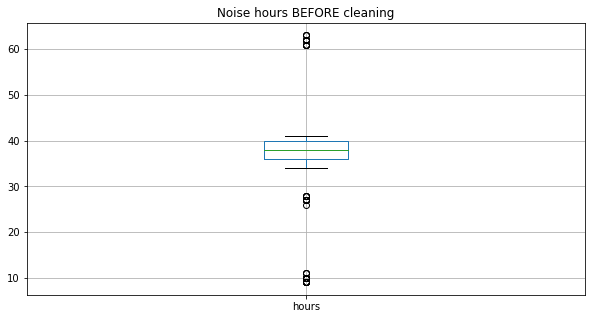

Amount of NULL values
Null values exist: True
Amount of NaN/NULL values: 34/34
Min: 35.0
Max: 40.0
Amount of NaN/NULL values: 131/131
Mean: 37.951557093425606
Amount of NaN/NULL values: 0/0


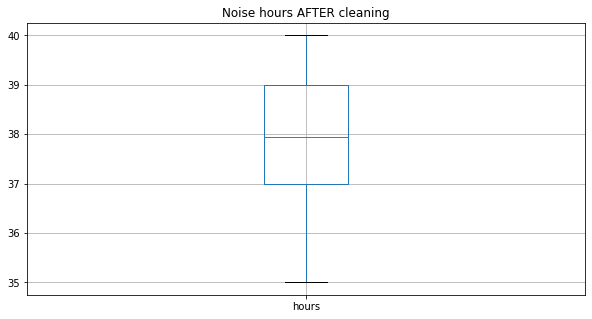

In [756]:
# Consistency
# Accuraccy
# Completeness
# Noise
# Interpretability
#
# hours.hrs : number of working hours during week
# [35 .. 40]
s = pd.Series(df.hours)
counter = 0
for x in s:
    # check if all values are float
    # if type(x) is not type(1):
    #     print('Invalid Type: ' + str(x))
    # check if positive but not in range
    if x > 40 or x < 35:
        counter += 1

print('Min: ' + str(df.hours.min()))
print('Max: ' + str(df.hours.max()))
print('Outside of range: ' + str(counter))

# check noise
df.boxplot(
    column=['hours'],
    figsize=(10, 5))
plt.title('Noise hours BEFORE cleaning')
plt.savefig('exports/07_01_hours_noise.png')
plt.show()

# check if a value is missing
print('Amount of NULL values')
print('Null values exist: ' + str(s.isnull().values.any()))
print('Amount of NaN/NULL values: ' + str(s.isna().sum()) + '/' + str(s.isnull().sum()))

# remove useless values < 35 and > 40
df.loc[df.hours < 35, 'hours'] = np.nan
df.loc[df.hours > 40, 'hours'] = np.nan
print('Min: ' + str(df.hours.min()))
print('Max: ' + str(df.hours.max()))
print('Amount of NaN/NULL values: ' + str(s.isna().sum()) + '/' + str(s.isnull().sum()))
# replace nan values with mean
print('Mean: ' + str(df.hours.mean()))
df.hours.fillna(df.hours.mean(), inplace=True)
print('Amount of NaN/NULL values: ' + str(s.isna().sum()) + '/' + str(s.isnull().sum()))

# check noise
df.boxplot(
    column=['hours'],
    figsize=(10, 5))
plt.title('Noise hours AFTER cleaning')
plt.savefig('exports/07_02_hours_noise.png')
plt.show()

## pension

In [757]:
# pension : employer contributions to pension plan
# [none, ret_allw, empl_contr]

# Consistency
# Accuraccy
# Completeness
# Noise
# Interpretability

s = pd.Series(df['pension'])
others_counter = 0
sp_counter = 0
for x in s:
    # check if all values are float
    if x == 'none' or x == 'ret_allw' or x == 'empl_contr':
        pass
    elif x == 'self payed':
        sp_counter += 1
    else:
        others_counter += 1
print('others: ' + str(others_counter))
print('sp: ' + str(sp_counter))
print(df[['ID', 'pension']].groupby('pension').count())
print('Amount of NaN/NULL values: ' + str(s.isna().sum()) + '/' + str(s.isnull().sum()))
# replace NaN values with 'none'
df.pension.fillna('none', inplace=True)
print('Amount of NaN/NULL values: ' + str(s.isna().sum()) + '/' + str(s.isnull().sum()))
df[['ID', 'pension']].groupby('pension').count()


others: 217
sp: 29
            ID
pension       
empl_contr  76
none        69
ret_allw    29
self payed  29
Amount of NaN/NULL values: 217/217
Amount of NaN/NULL values: 0/0


,ID
pension,
empl_contr,76
none,286
ret_allw,29
self payed,29


## standby pay

Min: -12.0
Max: 29.0
Mean: 6.991379310344827
Negative: 34
lower out of bounds: 21
Amount of NULL values
Null values exist: True
Amount of NaN/NULL values: 304/304
Amount of NULL values
Null values exist: True
Amount of NaN/NULL values: 359/359


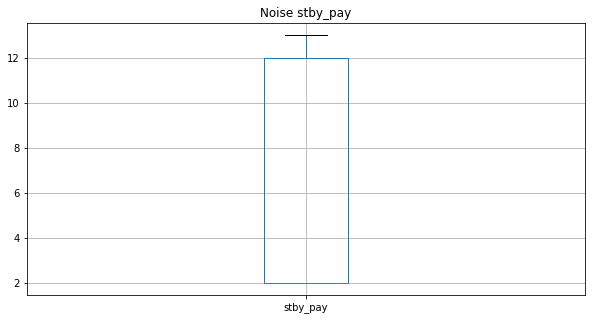

61

In [758]:
# stby_pay : standby pay = Bereitschaftsdienstvergütung
# [2 .. 25]
s = pd.Series(df.stby_pay)
counter = 0
for x in s:
    # check if all values are float
    if type(x) is not type(1.0):
        print('Invalid Type: ' + str(x))
    elif 25 < x:
        counter += 1

print('Min: ' + str(df.stby_pay.min()))
print('Max: ' + str(df.stby_pay.max()))
print('Mean: ' + str(df.stby_pay.mean()))
print('Negative: ' + str(df.stby_pay.lt(0).sum()))
print('lower out of bounds: ' + str(counter))

# check if a value is missing
print('Amount of NULL values')
print('Null values exist: ' + str(s.isnull().values.any()))
print('Amount of NaN/NULL values: ' + str(s.isna().sum()) + '/' + str(s.isnull().sum()))

df.loc[df.stby_pay < 2.0, 'stby_pay'] = np.nan
df.loc[df.stby_pay > 25.0, 'stby_pay'] = np.nan

print('Amount of NULL values')
print('Null values exist: ' + str(s.isnull().values.any()))
print('Amount of NaN/NULL values: ' + str(s.isna().sum()) + '/' + str(s.isnull().sum()))

# check noise
df.boxplot(
    column=['stby_pay'],
    figsize=(10, 5))
plt.title('Noise stby_pay')
plt.savefig('exports/08_stby_pay_noise.png')
plt.show()

df.stby_pay.count()

## shift differencial

Min: 0.0
Max: 25.0
Mean: 4.680672268907563
Negative: 0
lower out of bounds: 8
Amount of NULL values
Null values exist: True
Amount of NaN/NULL values: 182/182
Amount of NULL values
Null values exist: True
Amount of NaN/NULL values: 190/190


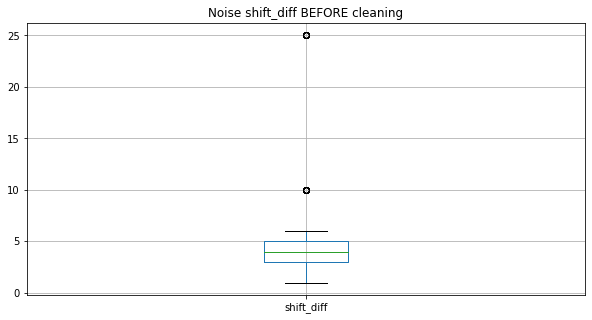

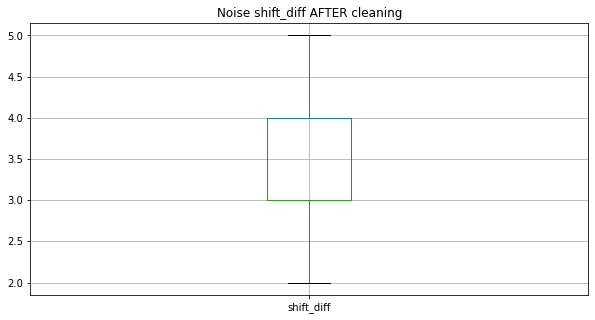

188

In [759]:
# shift_diff : shift differencial : supplement for work on II and III shift
# [1 .. 25]

s = pd.Series(df.shift_diff)
counter = 0
for x in s:
    # check if all values are float
    if type(x) is not type(1.0):
        print('Invalid Type: ' + str(x))
    elif 1 > x:
        counter += 1

print('Min: ' + str(df.shift_diff.min()))
print('Max: ' + str(df.shift_diff.max()))
print('Mean: ' + str(df.shift_diff.mean()))
print('Negative: ' + str(df.shift_diff.lt(0).sum()))
print('lower out of bounds: ' + str(counter))

# check if a value is missing
print('Amount of NULL values')
print('Null values exist: ' + str(s.isnull().values.any()))
print('Amount of NaN/NULL values: ' + str(s.isna().sum()) + '/' + str(s.isnull().sum()))

df.loc[df.shift_diff < 1.0, 'shift_diff'] = np.nan
print('Amount of NULL values')
print('Null values exist: ' + str(s.isnull().values.any()))
print('Amount of NaN/NULL values: ' + str(s.isna().sum()) + '/' + str(s.isnull().sum()))

# check noise
df.boxplot(
    column=['shift_diff'],
    figsize=(10, 5))
plt.title('Noise shift_diff BEFORE cleaning')
plt.savefig('exports/09_01_shift_diff_noise.png')
plt.show()

#remove noise first iteration
Q1 = df.shift_diff.quantile(0.25)
Q3 = df.shift_diff.quantile(0.75)
IQR = Q3 - Q1  #IQR is interquartile range.
iqr_filter = (df.shift_diff >= Q1 - 1.5 * IQR) & (df.shift_diff <= Q3 + 1.5 * IQR)
df = df.loc[iqr_filter]

#remove noise second iteration
Q1 = df.shift_diff.quantile(0.25)
Q3 = df.shift_diff.quantile(0.75)
IQR = Q3 - Q1  #IQR is interquartile range.
iqr_filter = (df.shift_diff >= Q1 - 1.5 * IQR) & (df.shift_diff <= Q3 + 1.5 * IQR)
df = df.loc[iqr_filter]

# check noise
df.boxplot(
    column=['shift_diff'],
    figsize=(10, 5))
plt.title('Noise shift_diff AFTER cleaning')
plt.savefig('exports/09_02_shift_diff_noise.png')
plt.show()

df.shift_diff.count()

# Consistency
# Accuraccy
# Completeness
# Noise
# Interpretability


## education allowance

In [760]:
# educ_allw.boolean : education allowance
# [yes no]
s = pd.Series(df['educ_allow'])
others_counter = 0
sp_counter = 0
for x in s:
    if x == 'yes' or x == 'no':
        pass
    elif x == 'maybe':
        others_counter += 1
print('others: ' + str(others_counter))
print(df[['ID', 'educ_allow']].groupby('educ_allow').count())
print('Amount of NaN/NULL values: ' + str(s.isna().sum()) + '/' + str(s.isnull().sum()))
# replace maybe values with NaN
df.loc[df.educ_allow == 'maybe', 'educ_allow'] = np.nan
df.educ_allow.fillna('no', inplace=True)
print('Amount of NaN/NULL values: ' + str(s.isna().sum()) + '/' + str(s.isnull().sum()))
print(df[['ID', 'educ_allow']].groupby('educ_allow').count())

others: 17
            ID
educ_allow    
maybe       17
no          54
yes         37
Amount of NaN/NULL values: 80/80
Amount of NaN/NULL values: 0/0
             ID
educ_allow     
no          151
yes          37


## holidays

Min: 3.0
Max: 21.0
Mean: 10.938202247191011
Negative: 0
lower out of bounds: 18
Amount of NULL values
Null values exist: True
Amount of NaN/NULL values: 10/10
Amount of NULL values
Null values exist: True
Amount of NaN/NULL values: 28/28


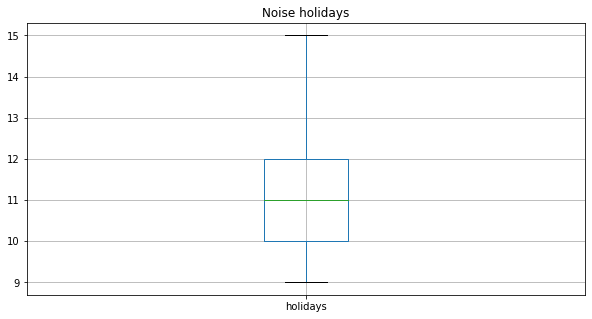

In [761]:
# holidays : number of statutory holidays
# [9 .. 15]
# Consistency
# Accuraccy
# Completeness
# Noise
# Interpretability
s = pd.Series(df.holidays)
counter = 0
for x in s:
    # check if all values are float
    if type(x) is not type(1.0):
        print('Invalid Type: ' + str(x))
    elif x < 9 or x > 15:
        counter += 1

print('Min: ' + str(df.holidays.min()))
print('Max: ' + str(df.holidays.max()))
print('Mean: ' + str(df.holidays.mean()))
print('Negative: ' + str(df.holidays.lt(0).sum()))
print('lower out of bounds: ' + str(counter))

# check if a value is missing
print('Amount of NULL values')
print('Null values exist: ' + str(s.isnull().values.any()))
print('Amount of NaN/NULL values: ' + str(s.isna().sum()) + '/' + str(s.isnull().sum()))

df.loc[df.holidays < 9.0, 'holidays'] = np.nan
df.loc[df.holidays > 15.0, 'holidays'] = np.nan
print('Amount of NULL values')
print('Null values exist: ' + str(s.isnull().values.any()))
print('Amount of NaN/NULL values: ' + str(s.isna().sum()) + '/' + str(s.isnull().sum()))

# replace null with mean value
df.holidays.fillna(df.holidays.mean(), inplace=True)

# check noise
df.boxplot(
    column=['holidays'],
    figsize=(10, 5))
plt.title('Noise holidays')
plt.savefig('exports/10_holidays_noise.png')
plt.show()

## vacation

In [762]:
# vacation : number of paid vacation days
# [ba, avg, gnr]

# Consistency
# Accuraccy
# Completeness
# Noise
# Interpretability

s = pd.Series(df['vacation'])
others_counter = 0
sp_counter = 0
for x in s:
    if x == 'ba' or x == 'avg' or x == 'gnr':
        pass
    else:
        others_counter += 1
print('others: ' + str(others_counter))
print(df[['ID', 'vacation']].groupby('vacation').count())
print('Amount of NaN/NULL values: ' + str(s.isna().sum()) + '/' + str(s.isnull().sum()))
# remove null values
df = df[df.vacation.notna()]

# rename the outcomes
df.loc[df.vacation == 'average', 'vacation'] = 'avg'
df.loc[df.vacation == 'below average', 'vacation'] = 'ba'
df.loc[df.vacation == 'generous', 'vacation'] = 'gnr'

s = pd.Series(df['vacation'])
print('Amount of NaN/NULL values: ' + str(s.isna().sum()) + '/' + str(s.isnull().sum()))

print(df[['ID', 'vacation']].groupby('vacation').count())

others: 188
               ID
vacation         
average        57
below average  64
generous       54
Amount of NaN/NULL values: 13/13
Amount of NaN/NULL values: 0/0
          ID
vacation    
avg       57
ba        64
gnr       54


## longterm disability

In [763]:
# lngtrm_disabil.boolean :
# employer's help during employee longterm disability [yes , no]

# Consistency
# Accuraccy
# Completeness
# Noise
# Interpretability

s = pd.Series(df['lngtrm_disabil'])
others_counter = 0
sp_counter = 0
for x in s:
    if x == 'yes' or x == 'no':
        pass
    else:
        others_counter += 1
print('others: ' + str(others_counter))
print(df[['ID', 'lngtrm_disabil']].groupby('lngtrm_disabil').count())
print('Amount of NaN/NULL values: ' + str(s.isna().sum()) + '/' + str(s.isnull().sum()))
# replace Nan values with yes since they hold the majority
df.lngtrm_disabil.fillna('no', inplace=True)
print('Amount of NaN/NULL values: ' + str(df.lngtrm_disabil.isna().sum()) + '/' + str(df.lngtrm_disabil.isnull().sum()))
print(df[['ID', 'lngtrm_disabil']].groupby('lngtrm_disabil').count())

others: 113
                ID
lngtrm_disabil    
no              14
yes             48
Amount of NaN/NULL values: 113/113
Amount of NaN/NULL values: 0/0
                 ID
lngtrm_disabil     
no              127
yes              48


## dental plan

In [764]:
# dntl_ins : employers contribution towards the dental plan
# [none, half, full]
s = pd.Series(df['dntl_ins'])
others_counter = 0
sp_counter = 0
for x in s:
    if x == 'none' or x == 'half' or x == 'full':
        pass
    else:
        others_counter += 1
print('others: ' + str(others_counter))
print(df[['ID', 'dntl_ins']].groupby('dntl_ins').count())
print('Amount of NaN/NULL values: ' + str(s.isna().sum()) + '/' + str(s.isnull().sum()))
# replace Nan values with none
df.dntl_ins.fillna('none', inplace=True)
print('Amount of NaN/NULL values: ' + str(df.dntl_ins.isna().sum()) + '/' + str(df.dntl_ins.isnull().sum()))
print(df[['ID', 'dntl_ins']].groupby('dntl_ins').count())

others: 76
          ID
dntl_ins    
full      29
half      44
none      26
Amount of NaN/NULL values: 76/76
Amount of NaN/NULL values: 0/0
           ID
dntl_ins     
full       29
half       44
none      102


## bereavement

In [765]:
# Consistency
# Accuraccy
# Completeness
# Noise
# Interpretability


# bereavement.boolean : employer's financial contribution towards the covering the costs of bereavement
# [yes , no]
# get rid of typo in col name
df = df.rename(columns={'breavement': 'bereavement'})
s = pd.Series(df['bereavement'])
others_counter = 0
sp_counter = 0
for x in s:
    if x == 'yes' or x == 'no':
        pass
    else:
        others_counter += 1
print('others: ' + str(others_counter))
print(df[['ID', 'bereavement']].groupby('bereavement').count())
print('Amount of NaN/NULL values: ' + str(s.isna().sum()) + '/' + str(s.isnull().sum()))
# remove maybe values
df.loc[df.bereavement == 'maybe', 'bereavement'] = np.nan
# replace Nan values with no
df.bereavement.fillna('no', inplace=True)
print('Amount of NaN/NULL values: ' + str(df.bereavement.isna().sum()) + '/' + str(df.bereavement.isnull().sum()))
print(df[['ID', 'bereavement']].groupby('bereavement').count())

others: 99
             ID
bereavement    
maybe         3
no            7
yes          69
Amount of NaN/NULL values: 96/96
Amount of NaN/NULL values: 0/0
              ID
bereavement     
no           106
yes           69


## health plan

In [766]:
# Consistency
# Accuraccy
# Completeness
# Noise
# Interpretability

# empl_hplan : employer's contribution towards the health plan
# [none, half, full]

# renaming
df = df.rename(columns={'Empl.hplan': 'empl_hplan'})

s = pd.Series(df['empl_hplan'])
others_counter = 0
sp_counter = 0
for x in s:
    if x == 'none' or x == 'half' or x == 'full':
        pass
    else:
        others_counter += 1
print('others: ' + str(others_counter))
print(df[['ID', 'empl_hplan']].groupby('empl_hplan').count())
print('Amount of NaN/NULL values: ' + str(s.isna().sum()) + '/' + str(s.isnull().sum()))

#replace .5 with half
df.loc[df.empl_hplan == '.5', 'empl_hplan'] = 'half'

# replace null with none
df.empl_hplan.fillna('none', inplace=True)

print('Amount of NaN/NULL values: ' + str(s.isna().sum()) + '/' + str(s.isnull().sum()))
print(df[['ID', 'empl_hplan']].groupby('empl_hplan').count())

others: 74
            ID
empl_hplan    
.5          13
full        46
half        30
none        25
Amount of NaN/NULL values: 61/61
Amount of NaN/NULL values: 0/0
            ID
empl_hplan    
full        46
half        43
none        86


## consent

In [767]:
s = pd.Series(df['consent'])
others_counter = 0
sp_counter = 0
print('others: ' + str(others_counter))
print(df[['ID', 'consent']].groupby('consent').count())
print('Amount of NaN/NULL values: ' + str(s.isna().sum()) + '/' + str(s.isnull().sum()))

# replace ?? with NaN
df.loc[df.consent == '??', 'consent'] = np.nan
print(df[['ID', 'consent']].groupby('consent').count())
print('Amount of NaN/NULL values: ' + str(s.isna().sum()) + '/' + str(s.isnull().sum()))

df

others: 0
          ID
consent     
??        11
bad       56
good     108
Amount of NaN/NULL values: 0/0
          ID
consent     
bad       56
good     108
Amount of NaN/NULL values: 11/11


,ID,duration,wage1,wage2,wage3,cola,hours,pension,stby_pay,shift_diff,educ_allow,holidays,vacation,lngtrm_disabil,dntl_ins,bereavement,empl_hplan,consent
1,2,1.000000,2.00,3.04,NaN,tc,36.000000,none,NaN,4.0,no,13.0,ba,no,none,no,half,good
6,7,3.000000,4.47,4.54,NaN,none,39.000000,none,NaN,3.0,yes,14.0,ba,no,none,no,half,bad
8,9,2.000000,2.13,2.00,NaN,none,40.000000,none,NaN,3.0,yes,14.0,ba,no,none,no,none,good
17,18,3.000000,2.50,3.03,NaN,none,35.000000,ret_allw,NaN,3.0,no,9.0,gnr,no,half,no,none,good
20,21,1.000000,4.01,3.97,2.09,none,39.000000,empl_contr,13.0,5.0,no,10.0,ba,yes,none,no,full,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,585,1.000000,2.49,4.49,NaN,tc,37.000000,none,NaN,5.0,yes,11.0,avg,no,full,yes,none,bad
586,587,3.000000,4.34,3.97,NaN,tc,37.951557,none,NaN,4.0,no,12.0,ba,no,half,no,half,bad
590,591,2.088285,2.96,3.99,NaN,none,38.000000,none,NaN,2.0,no,9.0,ba,no,none,yes,full,good
591,592,2.000000,4.03,4.47,NaN,none,36.000000,none,NaN,4.0,no,12.0,gnr,no,none,yes,none,good
